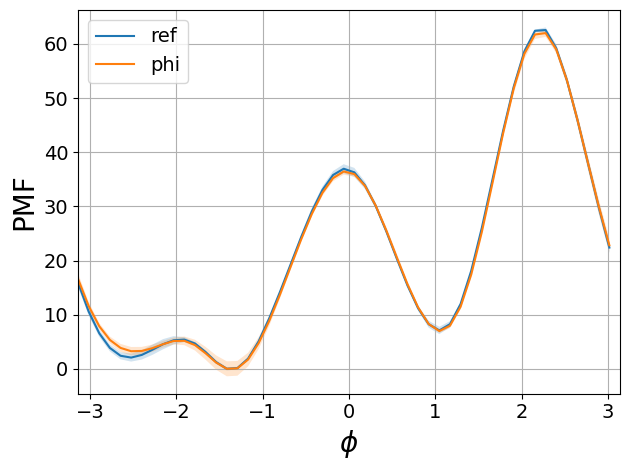

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

def marginalize(free):    
    # Filter data based on conditions
    free = free.reshape(51,51)
    
    # Calculate free energies
    free = -2.49 * np.logaddexp.reduce(-1 / 2.49 * free, 0)
    return free
    
def plot(methods, dates):
    base_dir = '/home/guest_sky/geodesic-interpolation-cv/simulations/aldp'
    # Iterate through all subdirectories
    for method,date in zip(methods,dates):
        pmfs = []
        fes_dir = os.path.join(base_dir, f'{method}/log/{date}')
        for seed in range(4):
            file = os.path.join(fes_dir, str(seed), "fes/100.dat")
        
            # Load data from the file
            data = np.loadtxt(file, comments='#')
            
            with open(file, 'r') as file:
                first_line = file.readline().strip()
                
            keys = first_line.split()[2:]
            free_idx = keys.index('file.free')
            free = data[:, free_idx]
            if method == 'ref':
                free = marginalize(free)
        
            pmfs.append(free)
            
        pmfs = np.array(pmfs)
        mean_pmf = np.mean(pmfs, axis=0)
        mean_pmf = mean_pmf - mean_pmf.min()
        std_pmf = np.std(pmfs, axis=0)
    
        phi = np.arange(-np.pi, np.pi, 2*np.pi/51)
        plt.plot(phi, mean_pmf, label=f'{method}')
        plt.fill_between(phi, mean_pmf - std_pmf, mean_pmf + std_pmf, alpha=0.2)

    plt.xlabel(r'$\phi$', fontsize=20, fontweight="medium")
    plt.ylabel('PMF', fontsize=20, fontweight="medium")
    plt.legend(fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(-np.pi, np.pi)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'../figures/pmfs.png', dpi=300, bbox_inches="tight")
    plt.savefig(f'../figures/pmfs.pdf', dpi=300, bbox_inches="tight")
    plt.show()

methods = ['ref','phi']
dates = ['0120114606', '0120114455']

plot(methods, dates)